In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG

In [2]:
name = 'd14perDRG_'

with open('D14_SNI_area.json') as f:
    results_sni = json.load(f)
with open('D14_Sham_area.json') as f:
    results_sham = json.load(f)

In [3]:
sham_il = analysis_perDRG.GroupData(results_sham, 'IL', number_of_rats=5)
sham_cl = analysis_perDRG.GroupData(results_sham, 'CL', number_of_rats=5)

sni_il = analysis_perDRG.GroupData(results_sni, 'IL', number_of_rats=6)
sni_cl = analysis_perDRG.GroupData(results_sni, 'CL', number_of_rats=6)

In [4]:
sham_il_counts = np.mean(sham_il.neuron_counts, axis=0)
sham_cl_counts = np.mean(sham_cl.neuron_counts, axis=0)
sni_il_counts = np.mean(sni_il.neuron_counts, axis=0)
sni_cl_counts = np.mean(sni_cl.neuron_counts, axis=0)

In [6]:
c = sns.color_palette("tab20")

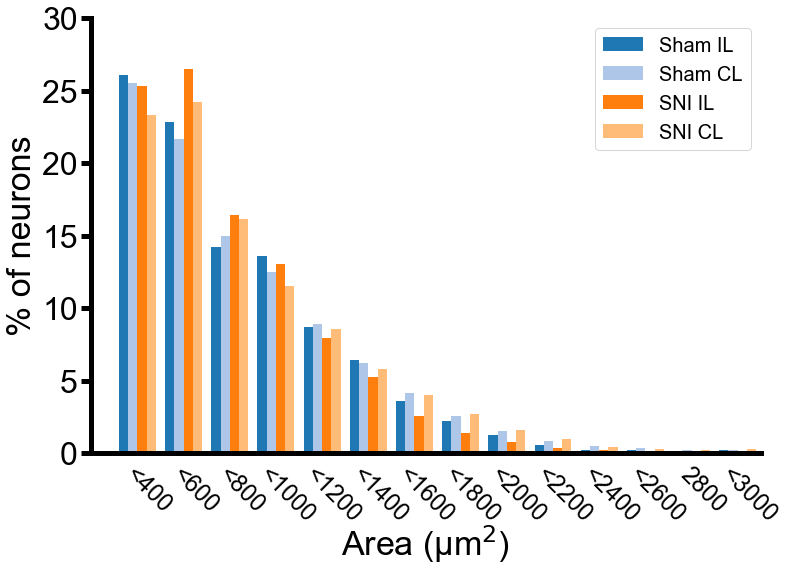

In [10]:
labels = ['<400', '<600', '<800', '<1000', '<1200', '<1400','<1600','<1800','<2000','<2200','<2400','<2600','2800', '<3000']
xpos = np.arange(300,3000,200)

plt.figure(figsize=(12,8))
plt.hist([sni_il.neuron_bins[:-1], sni_il.neuron_bins[:-1], sni_il.neuron_bins[:-1], sni_il.neuron_bins[:-1]], sni_il.neuron_bins, 
         weights=[sham_il_counts, sham_cl_counts, sni_il_counts, sni_cl_counts], color=c[0:4])

plt.rc('font',family='Arial')
plt.legend(['Sham IL', 'Sham CL', 'SNI IL', 'SNI CL'], fontsize=20)
plt.xlim(100,3000)
plt.ylim(0,30)
linewidth = 5
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth, bottom=False)
plt.yticks(fontsize=32)
for label, x in zip(labels, xpos):
    plt.annotate(label, xy=(x+50, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -10), textcoords='offset points', va='top', ha='center', fontsize=24, rotation=-45)
plt.xticks(visible=False)    
plt.ylabel('% of neurons', fontsize=34)
plt.xlabel('Area (µm$^2$)', fontsize=34, labelpad=70)
plt.savefig('Histogramm neurons d14.png', bbox_inches = "tight")
plt.show()